In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from keras.optimizers import RMSprop, SGD
from keras.constraints import maxnorm

Using Theano backend.


# Barcode CNN classifier

In [3]:
data_set = np.loadtxt('dataset/bar_codes_50_100.csv', delimiter=',', dtype=np.uint8)

In [4]:
image_height = 50
image_width = 100
image_depth = 3

In [5]:
np.random.shuffle(data_set)
Y = data_set[:,:1].astype('uint8')
X = data_set[:,1:].reshape(data_set.shape[0],image_depth,image_height,image_width)

In [6]:
trainset_num = int(len(X) * 0.7) # classical split 70/30

X_train = X[:trainset_num]
X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X[trainset_num:]
X_test = X_test.astype('float32')
X_test = X_test/255

In [7]:
classes_num = 2

Y_train = Y[:trainset_num]
Y_train = to_categorical(Y_train, classes_num)

Y_test = Y[trainset_num:]
Y_test = to_categorical(Y_test, classes_num)

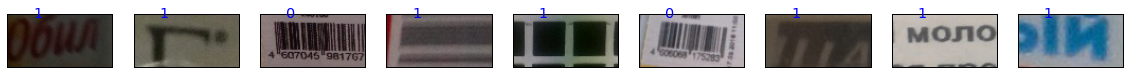

In [8]:
images_n_to_display = 9
sample_images = X_train[:images_n_to_display].reshape((images_n_to_display,image_height,image_width,image_depth))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.bwr)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,np.argmax(Y_train[i]), color='blue', size='x-large')

In [9]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(image_depth, image_height, image_width), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train, validation_split=0.2, batch_size=32, nb_epoch=epochs)

Train on 2325 samples, validate on 582 samples
Epoch 1/25
2325/2325 [==============================] - 113s - loss: 0.3994 - acc: 0.8413 - val_loss: 0.3479 - val_acc: 0.8385
Epoch 2/25
2325/2325 [==============================] - 124s - loss: 0.3703 - acc: 0.8452 - val_loss: 0.3357 - val_acc: 0.8522
Epoch 3/25
2325/2325 [==============================] - 120s - loss: 0.2609 - acc: 0.8942 - val_loss: 0.2006 - val_acc: 0.9072
Epoch 4/25
2325/2325 [==============================] - 123s - loss: 0.1524 - acc: 0.9462 - val_loss: 0.1306 - val_acc: 0.9691
Epoch 5/25
2325/2325 [==============================] - 123s - loss: 0.0981 - acc: 0.9686 - val_loss: 0.1265 - val_acc: 0.9588
Epoch 6/25
2325/2325 [==============================] - 125s - loss: 0.0878 - acc: 0.9673 - val_loss: 0.1081 - val_acc: 0.9708
Epoch 7/25
2325/2325 [==============================] - 127s - loss: 0.0759 - acc: 0.9763 - val_loss: 0.0871 - val_acc: 0.9742
Epoch 8/25
2325/2325 [==============================] - 125s - l

In [12]:
score = model.evaluate(X_test, Y_test, batch_size=16)

1247/1247 [==============================] - 16s    


In [13]:
print('Test set score: {}'.format(score))

Test set score: [0.09401536991397022, 0.97914995990376907]
